# The Shark Project

## EDA - Firs aproximation

<img src="Images/shark.gif" width="300" align="left">

## Importing 

In [1]:
import pandas as pd
import numpy as np
import sys
from IPython.display import clear_output
from src import cleanning_func as cf
import re
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

## Graphical adjustments

In [2]:
%matplotlib inline
%config Inlinebackend.figure_format= 'retina'
sns.set(font_scale = 1.5)
sns.set_context("poster")
sns.set(rc={"figure.figsize": (24.,12.)})
sns.set_style("whitegrid")
plt.style.use('seaborn-whitegrid')

### Get the data into Jupyter

In [3]:
data = pd.read_csv('data/attacks.csv',encoding = "ISO-8859-1")
data.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


### First exploration

In [4]:
data.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

misingno library is a project to visualize Nan of a dataframe

https://github.com/ResidentMario/missingno

<AxesSubplot:>

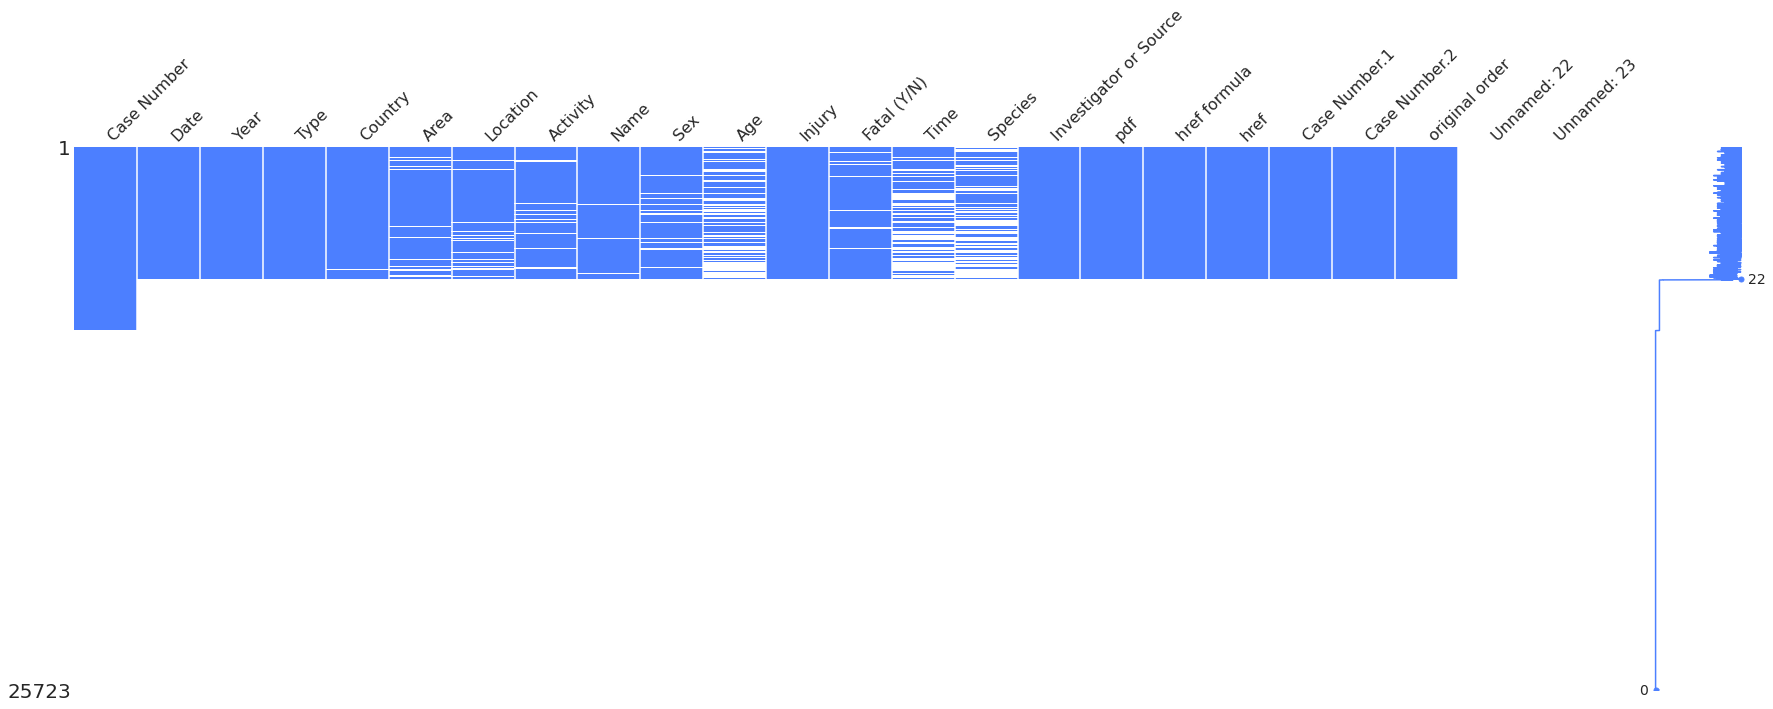

In [6]:
msno.matrix(data, figsize = (30,10), color=(0.3, 0.5, 1.0))

<AxesSubplot:>

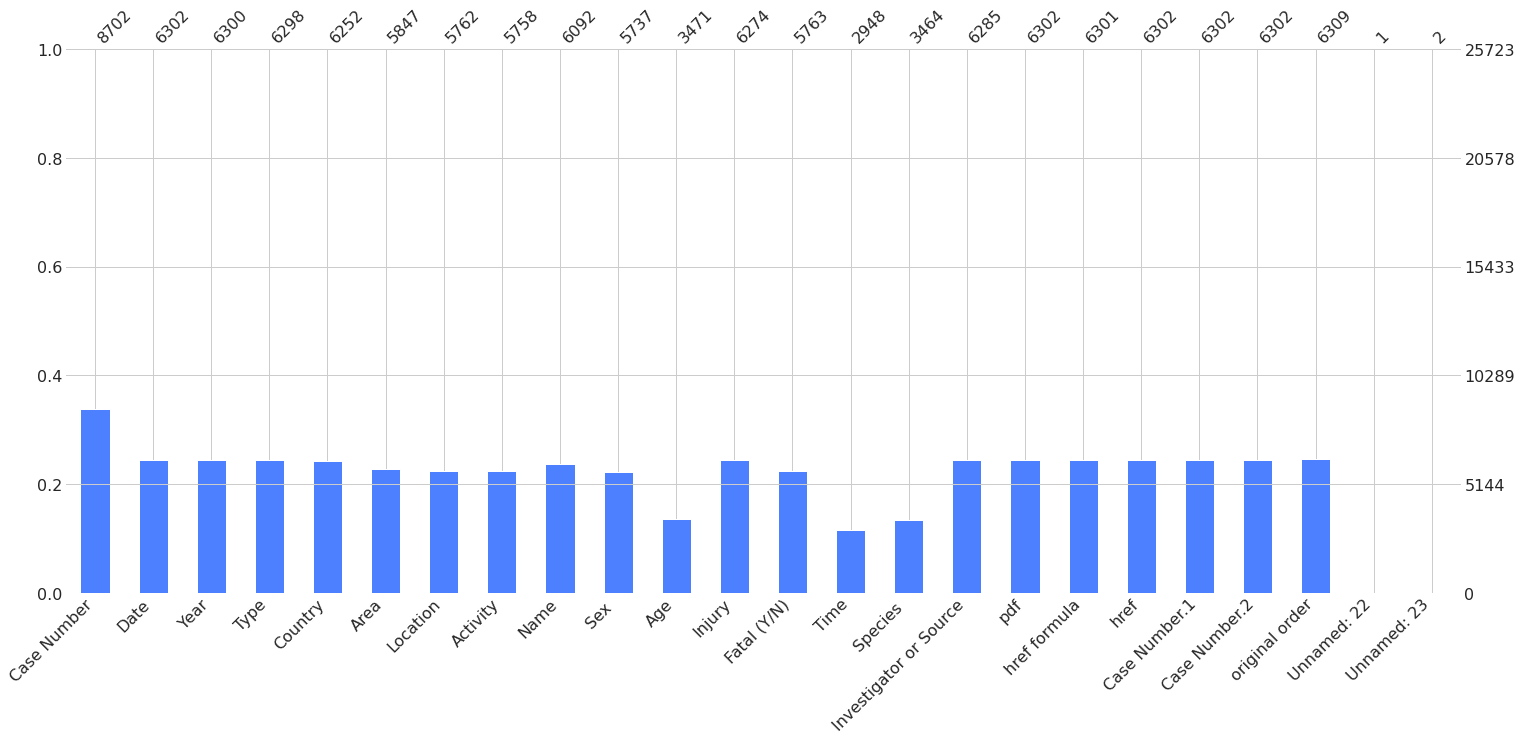

In [7]:
msno.bar(data, color=(0.3, 0.5, 1.0))

# My hipotesys:

<img src="Images/sc.gif" width="300" align="center">

## 1 Youth is meat for their tooth


## 2 Shark attacks happens because the human invasion of the animal ecosystem. Woman special ?


## 3 Is the white shark the most dangerous ?

# Cleaning 

  Our dataframe is more than a 65 % empty
  
  I will drop the colunns I do not want to use and the row emptys or allmost emtpys

In [8]:
col_dro = ['Case Number', 'Injury', 'Time', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23']
data = data.drop(col_dro, axis = 1)
data.sample(5)

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Fatal (Y/N),Species,Investigator or Source
12121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5502,1905,1905.0,Boating,USA,North Carolina,"Cape Lookout, Carteret County",Harpooning turtles,"skiff, occupants: Russel J. Coles and others",NaN,NaN,N,20' shark,"Clay Creswell, GSAF"
23777,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3780,25-Nov-1962,1962.0,Invalid,AUSTRALIA,Queensland,Townsville,NaN,Hugh Meikel,M,NaN,NaN,Shark involvement prior to death was not confi...,"H.D. Baldridge, p.162; SAF Case #1124"
24725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
dates = pd.to_datetime(data['Date'], errors = 'coerce', dayfirst=True)
data['Date']=dates 
data.sample(3)

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Fatal (Y/N),Species,Investigator or Source
936,2011-03-23,2011.0,Unprovoked,AUSTRALIA,New South Wales,Crowdy Head,Surfing,David Pearson,M,48,N,"Bull shark, 2.5m","Nine News, 3/24/2011"
2504,1993-03-12,1993.0,Unprovoked,USA,California,"Linda Mar Beach, Pedro Point, San Mateo County",Free diving & spearfishing (ascending),Don Berry,M,55,N,White shark,"R. Collier, p.140"
27,2018-04-15,2018.0,Unprovoked,BRAZIL,Pernambuco,Piedade,Swimming,Pablo de Melo,M,34,NaN,NaN,"Globo, 4/16/2018"


In [10]:
data.isna().sum()

Date                      20265
Year                      19423
Type                      19425
Country                   19471
Area                      19876
Location                  19961
Activity                  19965
Name                      19631
Sex                       19986
Age                       22252
Fatal (Y/N)               19960
Species                   22259
Investigator or Source    19438
dtype: int64

## Dropping almost empty columns

In [11]:
data.dropna(axis=0, how='all',thresh=2, inplace = True)

## Year Cleaning

In [12]:
data.Year.unique()

array([2018., 2017.,   nan, 2016., 2015., 2014., 2013., 2012., 2011.,
       2010., 2009., 2008., 2007., 2006., 2005., 2004., 2003., 2002.,
       2001., 2000., 1999., 1998., 1997., 1996., 1995., 1984., 1994.,
       1993., 1992., 1991., 1990., 1989., 1969., 1988., 1987., 1986.,
       1985., 1983., 1982., 1981., 1980., 1979., 1978., 1977., 1976.,
       1975., 1974., 1973., 1972., 1971., 1970., 1968., 1967., 1966.,
       1965., 1964., 1963., 1962., 1961., 1960., 1959., 1958., 1957.,
       1956., 1955., 1954., 1953., 1952., 1951., 1950., 1949., 1948.,
       1848., 1947., 1946., 1945., 1944., 1943., 1942., 1941., 1940.,
       1939., 1938., 1937., 1936., 1935., 1934., 1933., 1932., 1931.,
       1930., 1929., 1928., 1927., 1926., 1925., 1924., 1923., 1922.,
       1921., 1920., 1919., 1918., 1917., 1916., 1915., 1914., 1913.,
       1912., 1911., 1910., 1909., 1908., 1907., 1906., 1905., 1904.,
       1903., 1902., 1901., 1900., 1899., 1898., 1897., 1896., 1895.,
       1894., 1893.,

Fill the nan values with historic year of 999

In [13]:
data.Year = data.Year.fillna(999)

Converting year to int

In [14]:
data.Year = data.Year.apply(lambda year: int(year))

Grouping all the year before 1960 in the year 1959

In [15]:
data.Year = data.Year.apply(lambda year: 1959 if year<1960 else year)

In [16]:
data.Year.unique()

array([2018, 2017, 1959, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009,
       2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998,
       1997, 1996, 1995, 1984, 1994, 1993, 1992, 1991, 1990, 1989, 1969,
       1988, 1987, 1986, 1985, 1983, 1982, 1981, 1980, 1979, 1978, 1977,
       1976, 1975, 1974, 1973, 1972, 1971, 1970, 1968, 1967, 1966, 1965,
       1964, 1963, 1962, 1961, 1960])

Group the nat values of date, in 1959 

In [17]:
data.Date = data.Date.fillna('1-Jun-1959')

Let's see or df gaps now again

<AxesSubplot:>

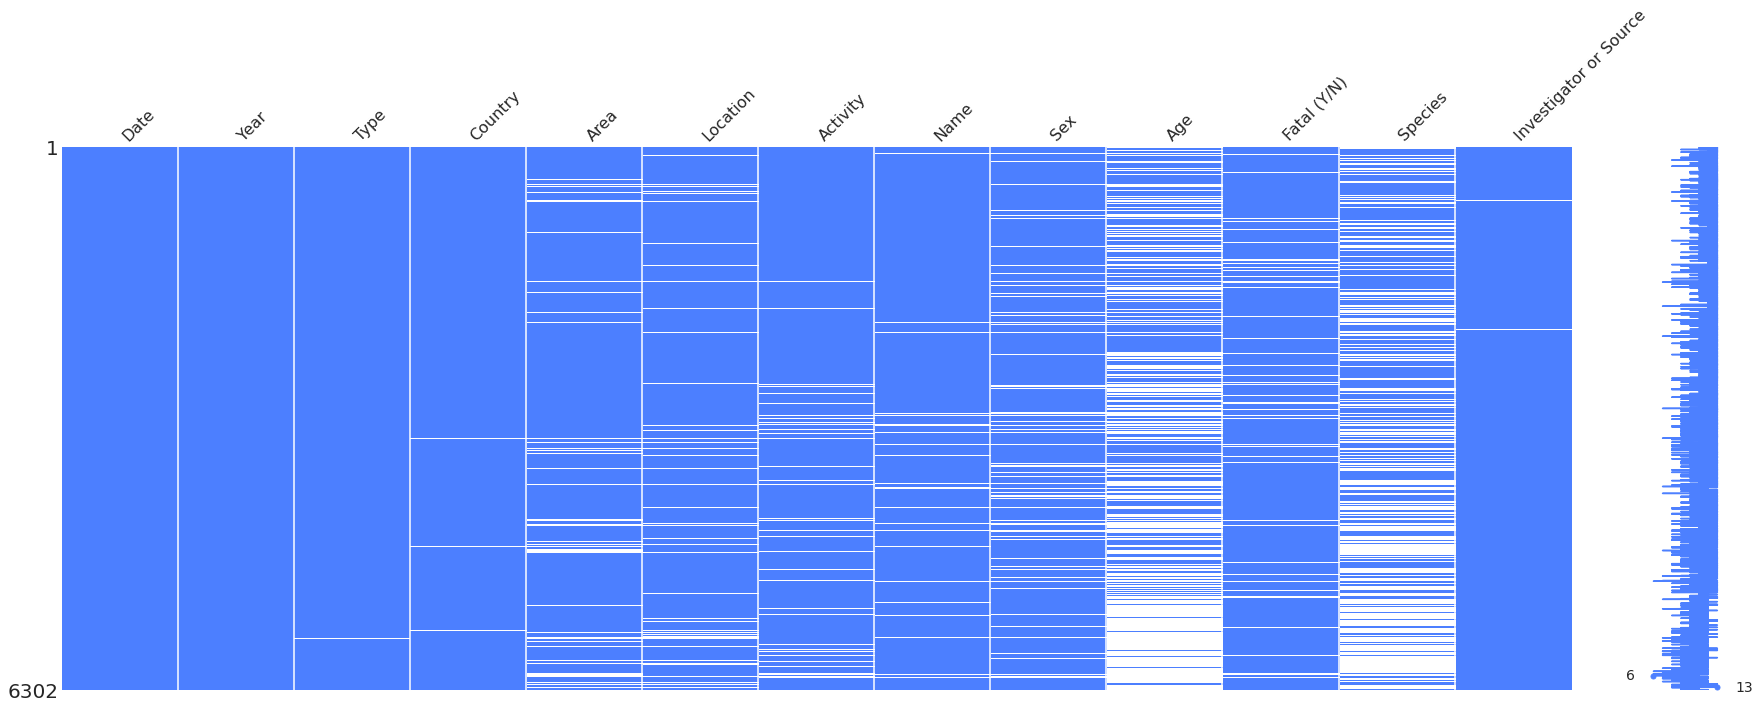

In [18]:
msno.matrix(data, figsize = (30,10), color=(0.3, 0.5, 1.0))

This start to look better

Rename the columns:

In [19]:
col_names = list(data.columns)
col_dic = {'Sex ':'Sex', 'Fatal (Y/N)': 'Fatal', 'Species ' : 'Species', 'Investigator or Source': 'Source'}
data.rename(columns=col_dic, copy=False, inplace = True)
data.sample(5)


,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Fatal,Species,Source
4916,1935-03-13,1959,Provoked,AUSTRALIA,Queensland,Pimpana River,Hauling in net with shark in it,William Charles Beitz,M,38,N,"""Blue nose shark""",G.P. Whitley
405,1959-06-01,2015,Provoked,AUSTRALIA,Western Australia,Rottnest Island,Swimming,Stephen,M,19,N,Wobbegong shark,"West Australian Police, 6/25/2015"
3861,1959-06-01,1962,Unprovoked,AUSTRALIA,South Australia,Dangerous Reef,Diving,Dan Argyll,M,NaN,N,NaN,"F. Dennis, p.76"
3880,1959-06-01,1961,Provoked,ITALY,Venice Province,Chioggia,Fishing,Pollione Perrini & Fioravante Perini,M,33 & 37,N,1 m shark,"C. Moore, GSAF"
491,2014-10-07,2014,Unprovoked,USA,Florida,"Cherie Down Park, Brevard County",Fishing,female,F,40,N,NaN,"Click Orlando, 10/7/2014"


<AxesSubplot:>

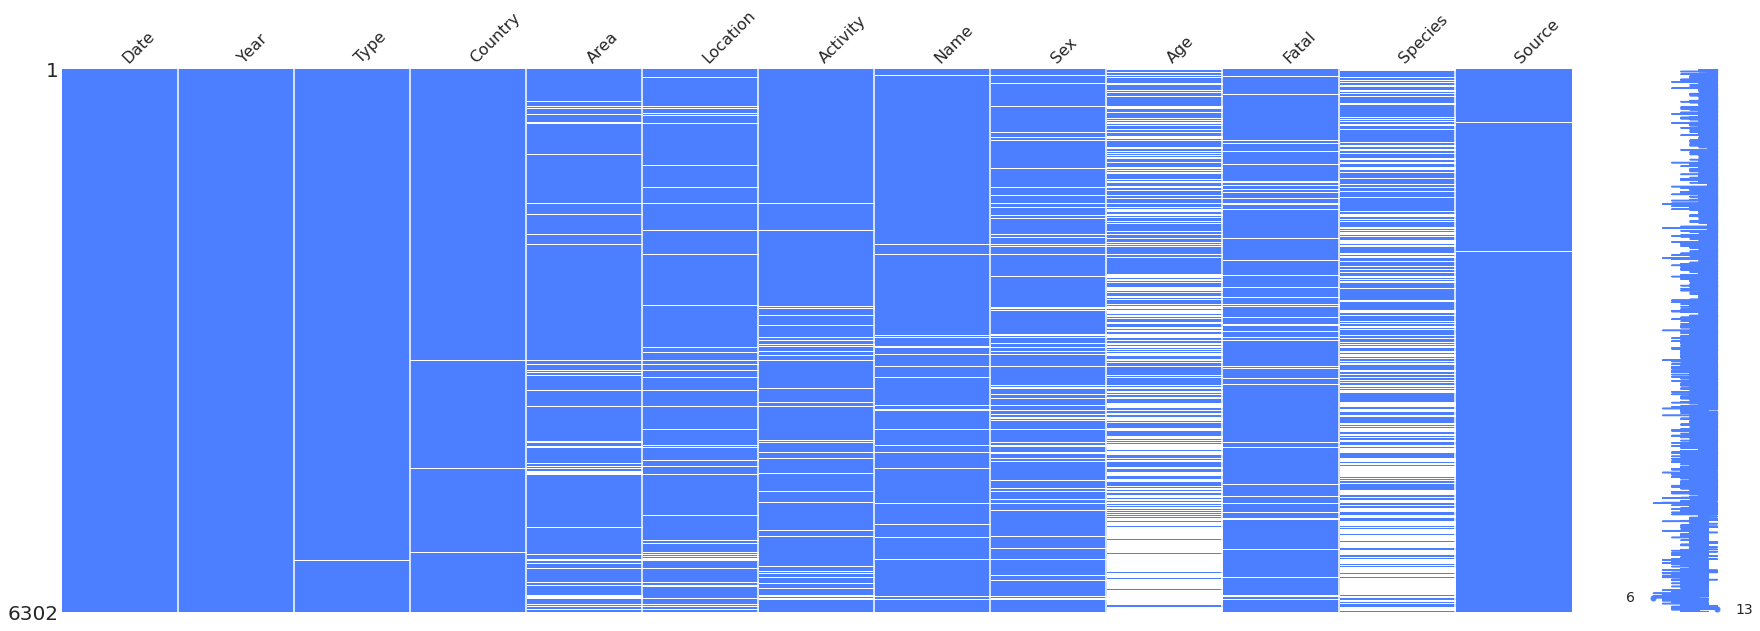

In [20]:
msno.matrix(data, figsize = (30,10), color=(0.3, 0.5, 1.0))

In [21]:
data.isna().sum()

Date           0
Year           0
Type           4
Country       50
Area         455
Location     540
Activity     544
Name         210
Sex          565
Age         2831
Fatal        539
Species     2838
Source        17
dtype: int64

In [22]:
print(data.Date.min(), data.Date.max())

1703-03-26 00:00:00 2018-06-25 00:00:00


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6302 entries, 0 to 6301
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      6302 non-null   datetime64[ns]
 1   Year      6302 non-null   int64         
 2   Type      6298 non-null   object        
 3   Country   6252 non-null   object        
 4   Area      5847 non-null   object        
 5   Location  5762 non-null   object        
 6   Activity  5758 non-null   object        
 7   Name      6092 non-null   object        
 8   Sex       5737 non-null   object        
 9   Age       3471 non-null   object        
 10  Fatal     5763 non-null   object        
 11  Species   3464 non-null   object        
 12  Source    6285 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(11)
memory usage: 689.3+ KB


# Type clean

In [24]:
data.Type.value_counts()

Unprovoked      4595
Provoked         574
Invalid          547
Sea Disaster     239
Boating          203
Boat             137
Questionable       2
Boatomg            1
Name: Type, dtype: int64

In [25]:
data.Type = data.Type.replace("nan", 'Invalid')
data.Type = data.Type.replace("Questionable", 'Invalid')
data.Type = data.Type.replace("Boatomg", 'Boat')
data.Type = data.Type.replace("Boating", 'Boat')


In [26]:
data.Type.value_counts()

Unprovoked      4595
Provoked         574
Invalid          549
Boat             341
Sea Disaster     239
Name: Type, dtype: int64

In [27]:
len(data)

6302

# Activity clean

In [28]:
data.Activity.value_counts()

Surfing                                   971
Swimming                                  869
Fishing                                   431
Spearfishing                              333
Bathing                                   162
                                         ... 
Playing with a frisbee in the shallows      1
Sinking of the ferryboat Dumaguete          1
Wreck of the Storm King                     1
Feeding mullet to sharks                    1
Wreck of  large double sailing canoe        1
Name: Activity, Length: 1532, dtype: int64

In [29]:
def list_a_reg(lista):
    """
    This function gets a column of dataframe a list of words to chage and a replace value to ,
    and values the list items.
    """       
    return [ ".*["+ palabra[0].upper() + palabra[0].lower()+"]("+ palabra[1:].upper()+"|"+palabra[1:].lower()+").*" for palabra in lista]

In [30]:
data.Activity.value_counts()

Surfing                                   971
Swimming                                  869
Fishing                                   431
Spearfishing                              333
Bathing                                   162
                                         ... 
Playing with a frisbee in the shallows      1
Sinking of the ferryboat Dumaguete          1
Wreck of the Storm King                     1
Feeding mullet to sharks                    1
Wreck of  large double sailing canoe        1
Name: Activity, Length: 1532, dtype: int64

In [31]:
lis_bot = list_a_reg(['Wreck', 'boat', 'sail', 'kay','cano', 'row', 'sink', 'Crui', 'Net', 'Yac','ferr', 'Cut','Shi','oce', 'sha', 'shu', 'ss'])
sus = 'Boating'
for i in range(len(lis_bot)):
    data.Activity = data.Activity.str.replace( lis_bot[i], sus, regex = True)

In [32]:
lis_bot = list_a_reg(['surf', 'board','padd', 'ski'])
sus = 'Surfing'
for i in range(len(lis_bot)):
    data.Activity = data.Activity.str.replace( lis_bot[i], sus, regex = True)

In [33]:
lis_bot = list_a_reg(['Bath', 'Stand', 'swim', 'float','spla', 'jump', 'water', 'Life', 'Alaca','praw'])
sus = 'Swimming'
for i in range(len(lis_bot)):
    data.Activity = data.Activity.str.replace( lis_bot[i], sus, regex = True)

In [34]:
lis_bot = list_a_reg(['fish'])
sus = 'Fishing'
for i in range(len(lis_bot)):
    data.Activity = data.Activity.str.replace( lis_bot[i], sus, regex = True)

In [35]:
lis_bot = list_a_reg(['div','snor','Catc' ,'Clam','Crab'])
sus = 'Diving'
for i in range(len(lis_bot)):
    data.Activity = data.Activity.str.replace( lis_bot[i], sus, regex = True)

In [36]:
lis_bot = list_a_reg(['shark'])
sus = 'Sharks'
for i in range(len(lis_bot)):
    data.Activity = data.Activity.str.replace( lis_bot[i], sus, regex = True)

In [37]:
lis_bot = list_a_reg(['sea'])
sus = 'varios'
for i in range(len(lis_bot)):
    data.Activity = data.Activity.str.replace( lis_bot[i], sus, regex = True)

In [38]:
lis_bot = list_a_reg(['air', 'plane', 'fire'])
sus = 'air'
for i in range(len(lis_bot)):
    data.Activity = data.Activity.str.replace( lis_bot[i], sus, regex = True)

In [39]:
data.Activity.value_counts().head()

Boating     1827
Swimming    1490
Surfing     1482
Diving       562
Wading       149
Name: Activity, dtype: int64

In [40]:
def cambia_acti(x):
    if x ==  'Diving':
        return x
    elif x == 'Fishing':
        return x
    elif x == 'Swimming':
        return x
    elif x == 'Surfing':
        return x
    elif x == 'Boating':
        return x
    else:
        return "Other"

In [41]:
data.Activity = data.Activity.apply(cambia_acti)

In [42]:
data.Activity.value_counts()

Boating     1827
Swimming    1490
Surfing     1482
Other        906
Diving       562
Fishing       35
Name: Activity, dtype: int64

In [43]:
len(data)

6302

## Sex clean

In [44]:
data.Sex.unique()
data.Sex.value_counts()

M      5094
F       637
M         2
N         2
lli       1
.         1
Name: Sex, dtype: int64

In [45]:
def cambia_sex(x):
    if x == "F":
        return "F"
    elif x == "M":
        return "M"
    else:
        return "M"

In [46]:
data.Sex = data.Sex.apply(cambia_sex)

# Species clean

In [47]:
data.Species = data.Species.fillna('unknown')

In [48]:
lis_bot = list_a_reg(['white'])
sus = 'white'
for i in range(len(lis_bot)):
    data.Species = data.Species.str.replace( lis_bot[i], sus, regex = True)

In [49]:
lis_bot = list_a_reg(['bull'])
sus = 'bull'
for i in range(len(lis_bot)):
    data.Species = data.Species.str.replace( lis_bot[i], sus, regex = True)

In [50]:
lis_bot = list_a_reg(['spin'])
sus = 'spinner'
for i in range(len(lis_bot)):
    data.Species = data.Species.str.replace( lis_bot[i], sus, regex = True)

In [51]:
lis_bot = list_a_reg(['invalid'])
sus = 'unknown'
for i in range(len(lis_bot)):
    data.Species = data.Species.str.replace( lis_bot[i], sus, regex = True)

In [52]:
lis_bot = list_a_reg(['tig'])
sus = 'tiger'
for i in range(len(lis_bot)):
    data.Species = data.Species.str.replace( lis_bot[i], sus, regex = True)

In [53]:
lis_bot = list_a_reg(['ree'])
sus = 'reef'
for i in range(len(lis_bot)):
    data.Species = data.Species.str.replace( lis_bot[i], sus, regex = True)

In [54]:
lis_bot = list_a_reg(['black'])
sus = 'black'
for i in range(len(lis_bot)):
    data.Species = data.Species.str.replace( lis_bot[i], sus, regex = True)

In [55]:
lis_bot = list_a_reg(['nur'])
sus = 'nurse'
for i in range(len(lis_bot)):
    data.Species = data.Species.str.replace( lis_bot[i], sus, regex = True)

In [56]:
lis_bot = list_a_reg(['blu'])
sus = 'blue'
for i in range(len(lis_bot)):
    data.Species = data.Species.str.replace( lis_bot[i], sus, regex = True)

In [57]:
lis_bot = list_a_reg(['shark'])
sus = 'unknown'
for i in range(len(lis_bot)):
    data.Species = data.Species.str.replace( lis_bot[i], sus, regex = True)

In [58]:
lis_bot = list_a_reg(['ham'])
sus = 'hammer'
for i in range(len(lis_bot)):
    data.Species = data.Species.str.replace( lis_bot[i], sus, regex = True)

In [59]:
lis_bot = list_a_reg(['ques', 'und', 'unid'])
sus = 'unknown'
for i in range(len(lis_bot)):
    data.Species = data.Species.str.replace( lis_bot[i], sus, regex = True)

In [60]:
def cambia_spe(x):
    if x ==  'unknown':
        return x
    elif x == 'white':
        return x
    elif x == 'tiger':
        return x
    elif x == 'bull':
        return x
    elif x == 'nurse':
        return x
    elif x == 'reef':
        return x
    elif x == 'spinner':
        return x
    elif x == 'black':
        return x
    else:
        return "unknown"

In [61]:
data.Species = data.Species.apply(cambia_spe)

In [62]:
data.Species.value_counts()

unknown    4898
white       667
tiger       276
bull        185
nurse        97
black        68
reef         64
spinner      47
Name: Species, dtype: int64

In [63]:
data.isna().sum()

Date           0
Year           0
Type           4
Country       50
Area         455
Location     540
Activity       0
Name         210
Sex            0
Age         2831
Fatal        539
Species        0
Source        17
dtype: int64

<AxesSubplot:>

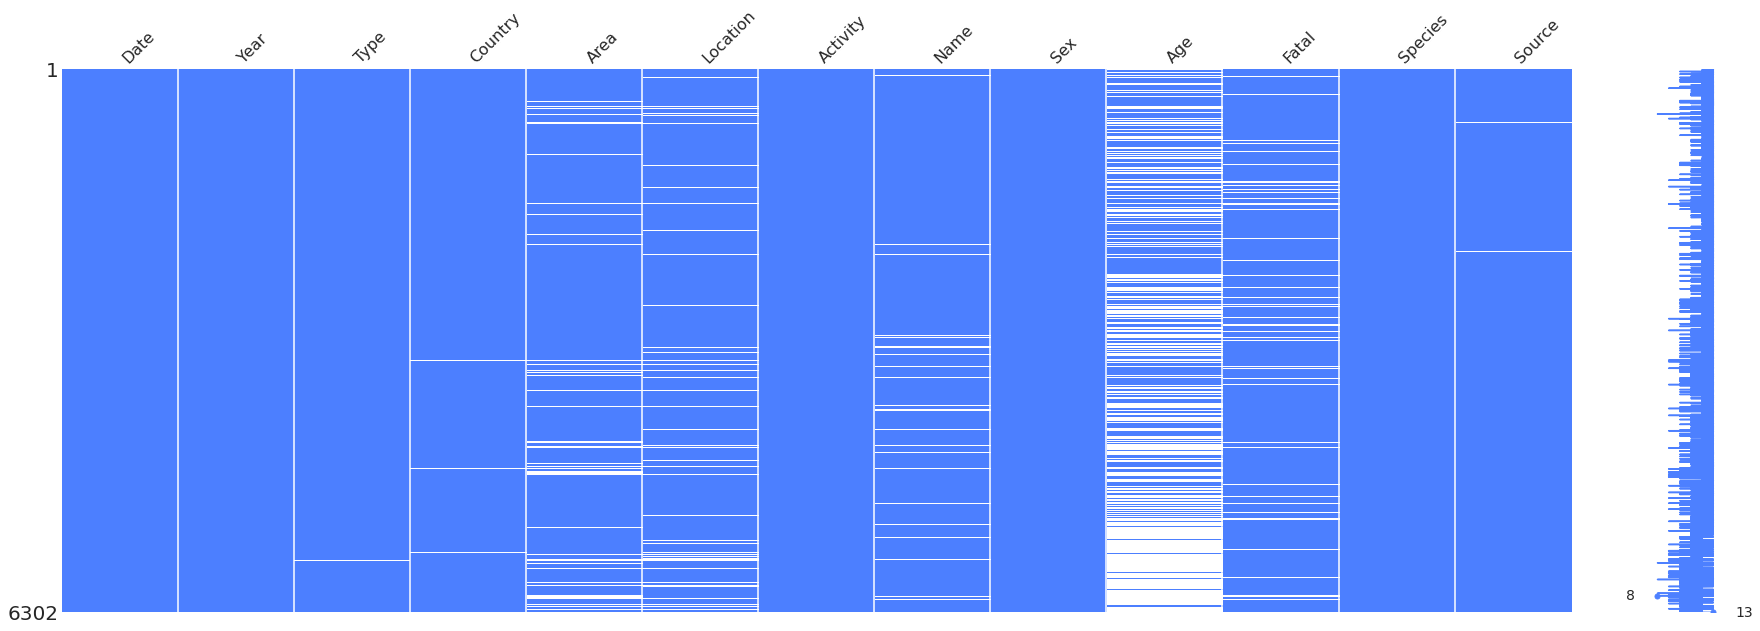

In [64]:
msno.matrix(data, figsize = (30,10), color=(0.3, 0.5, 1.0))

# Export data as cleaned.csv 

In [65]:
data.to_csv('data/cleaned.csv')